In [9]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

sim = Aer.get_backend('aer_simulator') 

## Bits

Bits are designed to be the world’s simplest alphabet, with only two characters, 0 and 1. Computer understands and stores all information in bits using binary number system. For example,

$$ (9213)_{10} = (9\times10^3) + (2\times10^2) + (1\times10^1) + (3\times10^0) $$
$$ (9213)_{10} = (1 \times 2^{13}) + (0 \times 2^{12}) + (0 \times 2^{11}) + (0 \times 2^{10}) + (1 \times 2^9) + (1 \times 2^8) + (1 \times 2^7) \\\\ \,\,\,   + (1 \times 2^6) + (1 \times 2^5) + (1 \times 2^4) + (1 \times 2^3) + (1 \times 2^2) + (0 \times 2^1) + (1 \times 2^0) = (10001111111101)_2 $$


In [5]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

Like standard digital computers, quantum computers are based on this same basic idea. The main difference is that they use *qubits*, an extension of the bit to quantum mechanics. In the rest of this section, we will explore what qubits are, what they can do, and how they do it. However, this section is not about quantum at all. So, we just use qubits as if they were bits.

## Circuit Diagram

Whether qubits or bits, they needs to be manipulated in order to turn the inputs into the outputs. For the simplest programs with very few bits, it is useful to represent this process in a diagram known as a *circuit diagram*. These have inputs on the left, outputs on the right, and operations represented by arcane symbols in between. These operations are called *gates*, mostly for historical reasons.

Here's an example of what a circuit looks like for standard, bit-based computers.

![image1](images/classical_circuit.png)

For quantum computers, the same basic idea is used but have different conventions for how to represent inputs, outputs, and the symbols used for operations. Here is the quantum circuit that represents the same process as above.

![image2](images/quantum_circuit.png)

In the rest of this section, we will go through how to build circuits.

## The First Quantum Circuit

In a circuit, typically there are three jobs: First, encode the input, then do some actual computation, and finally extract an output. Lets start by creating a circuit with eight qubits and eight outputs and measuring the qubits.

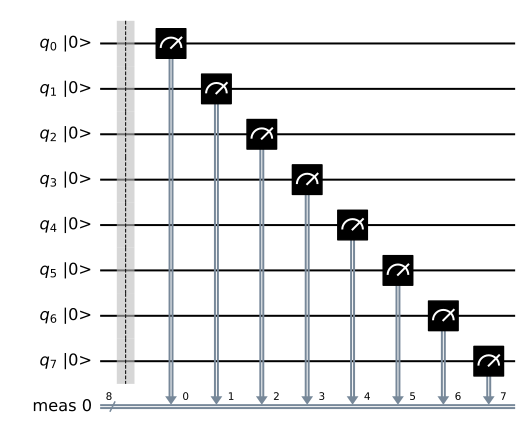

In [2]:
qc_output = QuantumCircuit(8)
qc_output.measure_all()
qc_output.draw(initial_state=True)

Qubits are always initialized to give the output 0. Since anything was not done to the qubits in the circuit above, this is exactly the result after measuring them. The circuit can be run many times and plotting the results in a histogram will always produce result 00000000: a 0 from each qubit.

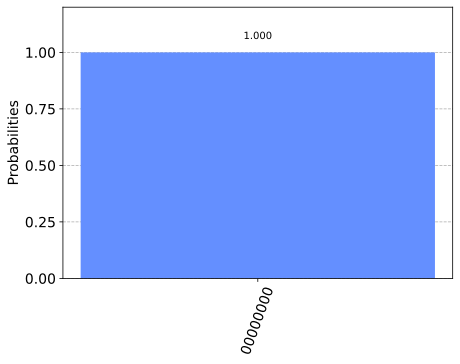

In [3]:
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

The reason for running many times and showing the result as a histogram is because quantum computers may have some randomness in their results. In this case, since anything quantum was not done, the ```00000000``` result is produced with certainty.

Note that this result comes from a quantum simulator, which is a standard computer calculating what an ideal quantum computer would do. Simulations are only possible for small numbers of qubits (~30 qubits). To run on a real device, ```Aer.get_backend('aer_simulator')``` should be replaced with the backend object of the desired device.

## Encoding An Input

Now let's look at how to encode a different binary string as an input. For this, we need a NOT gate. This is the most basic operation in a computer. It simply flips the bit value: ```0``` becomes ```1``` and ```1``` becomes ```0```. For qubits, it is an operation called ```x``` that does the job of the NOT.

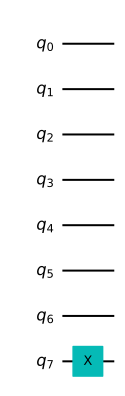

In [4]:
qc_encode = QuantumCircuit(8)
qc_encode.x(7)
qc_encode.draw()

Let's, measure all qubits:

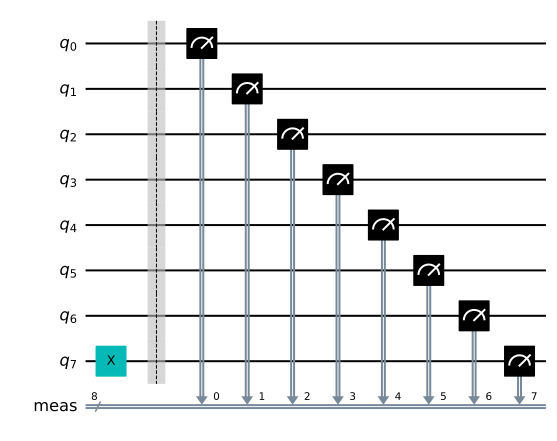

In [5]:
qc_encode.measure_all()
qc_encode.draw()

Now we can run the combined circuit and look at the results.

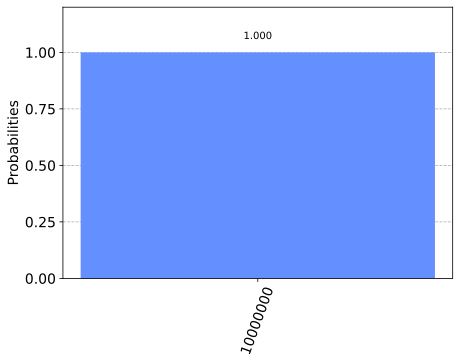

In [6]:
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

Now our computer outputs the string ```10000000``` instead.

The bit we flipped, which comes from qubit 7, lives on the far left of the string. This is because Qiskit numbers the bits in a string from right to left. A flipped qubit 7 tells that there is a $2^7$. So, we’ve now written the number 128 in our simple 8-bit computer.

For another example, if 37 needed to be encoded, we would have qubit 0, 2, and 5 should be flipped, as $(37)_{10} = (1 \times 2^{5}) + (0 \times 2^{4}) + (0 \times 2^{3}) + (1 \times 2^{2}) + (0 \times 2^1) + (1 \times 2^0) = (100101)_2$ and it would look like: 

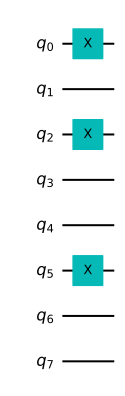

In [7]:
qc_encode = QuantumCircuit(8)
qc_encode.x(0)
qc_encode.x(2)
qc_encode.x(5)
qc_encode.draw()

## An Adder Circuit

The operation of a *half adder* is:

```
0+0 = 00 (in decimal, 0+0=0)
0+1 = 01 (in decimal, 0+1=1)
1+0 = 01 (in decimal, 1+0=1)
1+1 = 10 (in decimal, 1+1=2)
```
Adding two large number can be broken down to just two bit, then sum them and merge the results. Thus any addition is possible if the half adder can be implemented. Let's make the half adder using Qiskit. This will include a part of the circuit that encodes the input, a part that executes the algorithm, and a part that extracts the result. The first part will need to be changed if there is a new input, but the rest will always remain the same.

**The algorithm**<br>

The rightmost bit in all four of these answers is completely determined by whether the two bits we are adding are the same or different. So for ```0+0``` and ```1+1```, where the two bits are equal, the rightmost bit of the answer comes out ```0```. For ```0+1``` and ```1+0```, where we are adding different bit values, the rightmost bit is ```1```.

To get this part of our solution correct, we need something that can figure out whether two bits are different or not. Traditionally, this is called an XOR gate.

| Input 1 | Input 2 | XOR Output |
|:-------:|:-------:|:------:|
| 0       | 0       | 0      |
| 0       | 1       | 1      |
| 1       | 0       | 1      |
| 1       | 1       | 0      |

In quantum computers, the job of the XOR gate is done by the controlled-NOT gate. Since that's quite a long name, we usually just call it the CNOT. In Qiskit its name is ```cx```. The circuit looks like below:

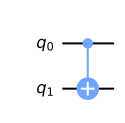

In [8]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

This is applied to a pair of qubits. One acts as the control qubit (this is the one with the little dot). The other acts as the *target qubit* (with the big circle that has a ```+``` inside it).

There are multiple ways to explain the effect of the CNOT. One is to say that it looks at its two input bits to see whether they are the same or different. Next, it overwrites the target qubit with the answer. The target becomes ```0``` if they are the same, and ```1``` if they are different.

<img src="images/cnot_xor.svg">

Another way of explaining the CNOT is to say that it does a NOT on the target if the control is ```1```, and does nothing otherwise. This explanation is just as valid as the previous one (in fact, it’s the one that gives the gate its name).

Here's a circuit that tests the CNOT with the input ```01``` (```q1q0```):

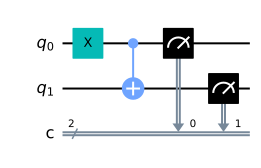

In [9]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

The output is ```11```. Because, the CNOT finds that the inputs are different, which means that it wants to output ```1```. It does this by writing over the state of qubit 1 (which, is on the left of the bit string), turning ```01``` into ```11```.

Here is a table showing all the possible inputs and corresponding outputs of the CNOT gate:

| Input (q1 q0) | Output (q1 q0) |
|:-------------:|:--------------:|
| 00            | 00             |
| 01            | 11             |
| 10            | 10             |
| 11            | 01             |

For the half adder, just overwriting one input is not enough. Instead, we want to write the result on a different pair of qubits. For this, we can use two CNOTs. First CNOT will keep the input of **q0** intact in **q2**. And the second one will do the **XOR** operation and keep the output in **q2**. 

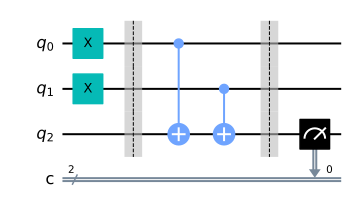

In [6]:
qc_ha = QuantumCircuit(3,2)

# a = 1, b = 1
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()

qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()

qc_ha.measure(2,0)

qc_ha.draw()

Now, half part of the half adder is done. We just need the carry bit. We can introduce another qubit to hold the carry bit of the output. Now, from the half adder operation, it is clear that the carry bit is ```1``` only when the both input fields are ```1```. So, from a classical machines perspective, it is an **AND** gate. This is called the ***Toffoli*** in quantum, and denoted by ```ccx``` command.

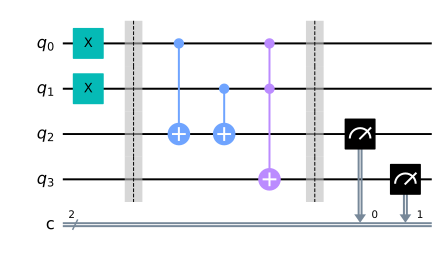

In [10]:
qc_ha = QuantumCircuit(4,2)

qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()

qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.ccx(0,1,3)
qc_ha.barrier()

qc_ha.measure(2,0)
qc_ha.measure(3,1)

qc_ha.draw()

As we are calculating ```1+1```, because the two input bits are both ```1```. Let's see the output.

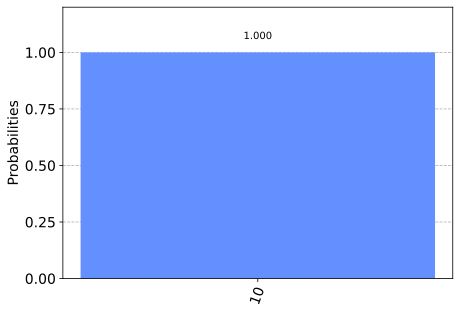

In [11]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

The result is ```10```, which is the binary representation of the number 2. We have built a computer that can solve the famous mathematical problem of ```1+1```!

The half adder contains everything needed for addition. With the NOT, CNOT, and Toffoli gates, programs to add any set of numbers of any size can be created.

These three gates are enough to do everything else in computing too. In fact, we can even do without the CNOT. Additionally, the NOT gate is only really needed to create bits with value ```1```. The Toffoli gate is essentially the atom of mathematics. It is the simplest element, from which every other problem-solving technique can be compiled.